In [26]:
import pandas as pd
import sqlite3

In [27]:
database_path = '../historical_stock_data.db'

In [28]:
def load_data(ticker):
    with sqlite3.connect(database_path) as conn:
        query = f"SELECT * FROM stock_data WHERE ticker = '{ticker}'"
        df = pd.read_sql_query(query, conn)
    return df

In [29]:
def get_symbols():
    with sqlite3.connect(database_path) as conn:
        symbols = pd.read_sql_query("SELECT DISTINCT ticker FROM stock_data", conn)
    return symbols['ticker'].tolist()

def get_date_range(ticker):
    with sqlite3.connect(database_path) as conn:
        query = f"SELECT MIN(timestamp) as start_date, MAX(timestamp) as end_date FROM stock_data WHERE ticker = '{ticker}'"
        date_range = pd.read_sql_query(query, conn)
    return date_range.iloc[0]

In [44]:
# Get list of symbols
symbols = get_symbols()
print(symbols)

# Get date range for a specific symbol
date_range = get_date_range('WBA')  # Example for Apple Inc.
print(date_range)

# Load data into DataFrame for visualization
df = load_data('WBA')  # Example for Apple Inc.


['AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'NVDA', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
start_date    2014-12-31
end_date      2023-12-29
Name: 0, dtype: object


In [45]:
date_range[0]

/tmp/ipykernel_1726951/40090645.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date_range[0]


'2014-12-31'

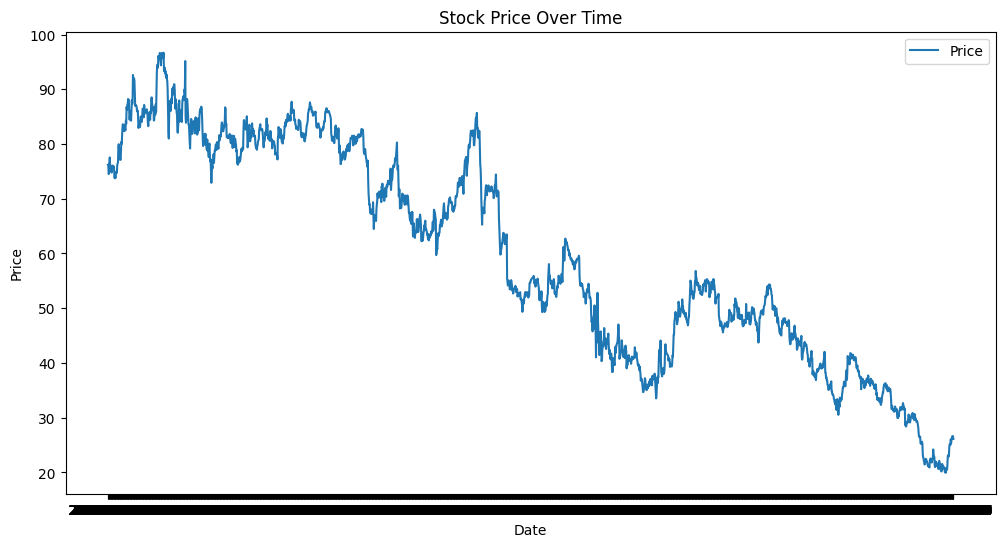

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()
